In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Finding correlation between different data

In [8]:
correlation = df.select_dtypes(include=['number']).corr()

<Axes: >

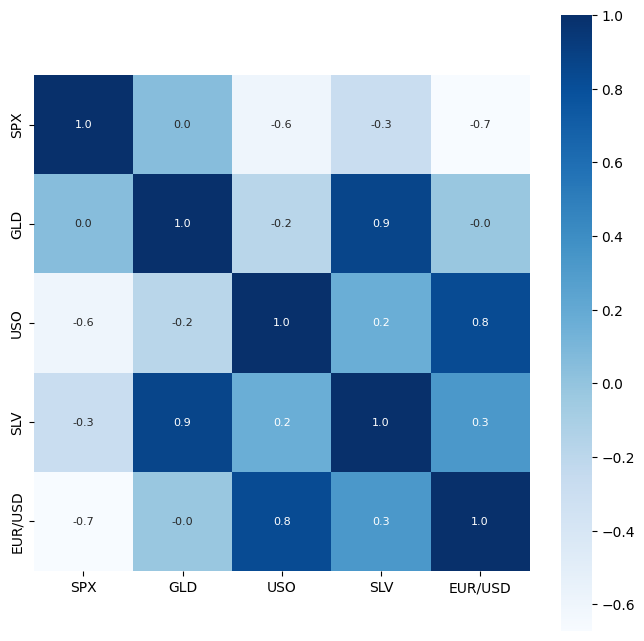

In [12]:
# constructing a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
# correaltion values for gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\intel\AppData\Local\Temp\ipykernel_12560\563446703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='blue')


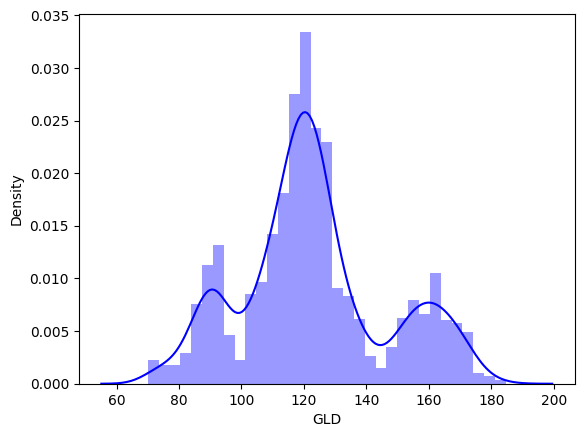

In [18]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='blue')
plt.show()

### Splitting Features and Target

In [19]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

#### Splitting into Train and Test Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

#### Model Training

In [25]:
regressor=RandomForestRegressor(n_estimators=100)

In [26]:
#training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

#### Model Evaluation

In [27]:
test_data_prediction=regressor.predict(X_test)

In [28]:
# r squared error
error_score = metrics.r2_score(y_test,test_data_prediction)

In [29]:
error_score

0.9893306215320057

#### comparing the Actual value and Predicted value

In [30]:
y_test=list(y_test)

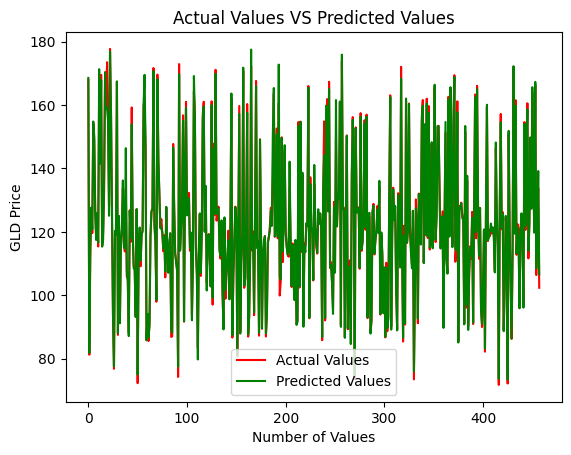

In [34]:
plt.plot(y_test,color='red',label='Actual Values')
plt.plot(test_data_prediction,color='green',label='Predicted Values')
plt.title('Actual Values VS Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()